In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def compute_costs(b, w, points):
    """
    y = wx + b
    """
    
    totalError=0
    for i in range(0,len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (w*x + b))** 2
    return totalError / float(len(points))

In [3]:
def step_gradient(b_current, w_current, points, learningRate):
    b_gradient = 0
    w_gradient = 0
    N = float(len(points))
    for i in range(0,len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2 / N) * (y - ((w_current * x) + b_current))    #-(y - y_hat) = (y_hat - y)
        w_gradient += -(2 / N) * x * (y - ((w_current * x) + b_current))
    new_b = b_current - (b_gradient * learningRate)
    new_w = w_current - (w_gradient * learningRate)
    return [new_b, new_w]

In [4]:
def gradient_descent_runner(points, strating_b, strating_w, learningRate, num_iteration):
    b = strating_b
    w = strating_w
    for i in range(num_iteration):
        b, w = step_gradient(b, w, np.array(points), learningRate)
    return [b, w]

In [5]:
def plot_data(b, w):
    plt.scatter(initial_X, initial_y)
    plt.xlabel('x1')
    plt.ylabel('y1')
    x_min, x_max = -0.05, 2.15
    x = np.linspace(x_min, x_max, 100)
    yy = w * x + b
    plt.plot(x, yy, c='orange')
    plt.show()

Starting at b = 2， w = 1 , error = 18.555538008761946
-----------
After 8000 iterations b = 4.010900453809263， w = 3.015967310680829 , error = 1.098917201736525


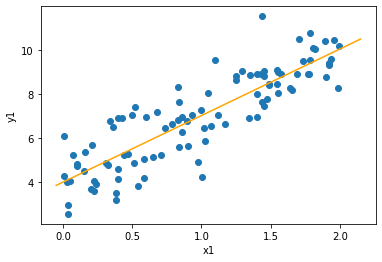

In [6]:
points = np.genfromtxt('./data/data.txt', delimiter=' ')
learning_rate = 0.001
initial_b = 2
initial_w = 1
num_iterations = 8000
print("Starting at b = {0}， w = {1} , error = {2}".format(initial_b, initial_w, compute_costs(initial_b, initial_w, points)))
print('-----------')
[b, w] = gradient_descent_runner(points, initial_b, initial_w, learning_rate, num_iterations)
print("After {0} iterations b = {1}， w = {2} , error = {3}".format(num_iterations, b, w, compute_costs(b, w, points)))
initial_X = points[:,0]
initial_y = points[:,1]
plot_data(b,w)